In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\ACB.csv")
df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,3910.0
1,3910.0
2,3885.1
3,3885.1
4,3910.0
...,...
2488,22800.0
2489,23050.0
2490,23200.0
2491,23250.0


In [3]:
# Chia train test
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[24966.39644081 24976.12883442 24985.86122803 24995.59362163
 25005.32601524 25015.05840885 25024.79080245 25034.52319606
 25044.25558967 25053.98798327 25063.72037688 25073.45277049
 25083.18516409 25092.9175577  25102.64995131 25112.38234491
 25122.11473852 25131.84713213 25141.57952573 25151.31191934
 25161.04431295 25170.77670656 25180.50910016 25190.24149377
 25199.97388738 25209.70628098 25219.43867459 25229.1710682
 25238.9034618  25248.63585541]


In [6]:
y_pred = model.predict(np.array(test_data.index).reshape(-1, 1))

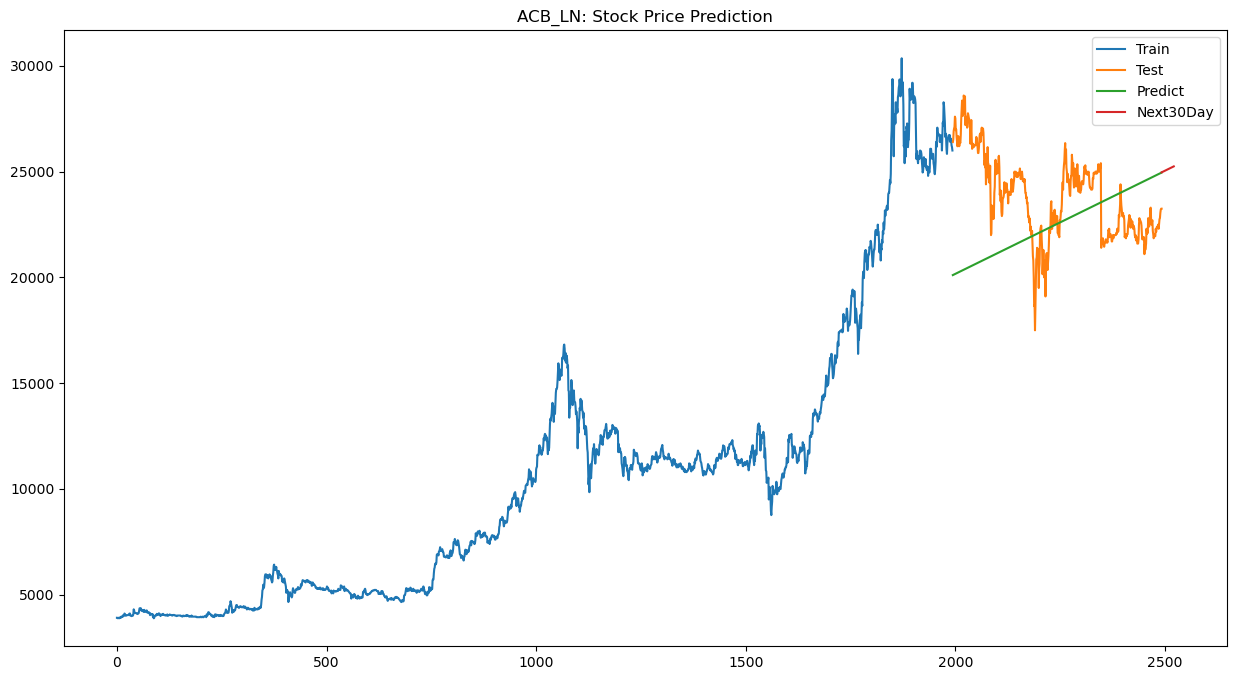

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predict','Next30Day'])
plt.title('ACB_LN: Stock Price Prediction')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, mean_squared_log_error
import numpy as np
# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100
# Tính toán RMSE, MAPE, MDA trên tập test
test_score_rmse=np.sqrt(mean_squared_error(test_data, y_pred))
test_score_mape=mean_absolute_percentage_error(test_data, y_pred) * 100
test_score_mda=calculate_mda(test_data, y_pred)
msle = mean_squared_log_error(test_data, y_pred)
print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')
print('MSLE trên tập test là:', msle)

RMSE trên tập test là: 3245.4505167824846
MAPE trên tập test là: 10.863504666184998 %
MDA trên tập test là: 0.0 %
MSLE trên tập test là: 0.019321336426360722


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20440\640355832.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
